In [1]:
import numpy as np
import oceanDAS as odas
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, datetime, timezone
from scipy import signal
import cmocean

%matplotlib inline
%cd -q '/Users/hglover/Library/CloudStorage/Box-Box/FiberExperiments/DAScomparison_paper/'


# load useful info like depth and noise floor freq for each site
h, f_noise, clrs = odas.all_line_info()

def calcPSD(rawstrain,metadata,frq_noise):
#     frq_noise = odas.calcnoisefloor(rawstrain,metadata)
    rawstrain = (rawstrain - rawstrain[0])/(1e-6) #microStrain to strain for units
    frq_w,psd_w = signal.welch(rawstrain,fs=metadata['fs'],window='hann',nperseg=metadata['fs']*60,detrend=False)
    psd_w = 20*np.log10(psd_w); # dB rel uE
    psd_w[frq_w>frq_noise]=np.nan
    return frq_w,psd_w


In [2]:
# Baseline data



# Load in one channel at each site (or load stack and take out one channel)
# Duck
pname = 'DuckNC_Glover/'
fname = 'decimator_2021-11-20_20.25.43_UTC_001612.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadDuck(pname,fname)
ns,nx = rawstrain.shape
rawstrain = rawstrain[:,int(nx/2)]
frq_duck,psd_duck_raw = calcPSD(rawstrain,metadata,f_noise[0])

# KNO
pname = 'KNO_Glover/'
fname = 'KNOFIber2_SKT3_copier3_2023-01-21_21-36-37_UTC_002536.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadKNO(pname,fname,fiber=2)
rawstrain = rawstrain[:,-20]
frq_kno,psd_kno_raw = calcPSD(rawstrain,metadata,f_noise[1])

# MVCO
pname = 'MarthasVineyard_Smith/'
fname = '20221227000000_f0200Hz_dx4m_nch2112_f2Hz.nc'
rawstrain,das_time,chnl,metadata = odas.loadMV(pname,fname)
rawstrain = rawstrain[:,1696]
frq_mvco,psd_mv_raw = calcPSD(rawstrain,metadata,f_noise[2])

# Oliktok
pname = 'OliktokPoint_Smith/'
fname = 'rawdata/10840/CODAS.D4__20211110_170007.174__chn-10840.sac'
rawstrain,das_time,h_oli,metadata = odas.loadOliktokSingle(pname,fname)
frq_oli,psd_oli_raw = calcPSD(rawstrain,metadata,f_noise[3])

# Homer
pname = 'HomerAK_Williams/'
fname = 'GCI_TERRA_2p5Hz_data.h5'
onechn = True
rawstrain,das_time,chnl,depth,metadata = odas.loadHomer(pname,fname,onechn)
frq_hom,psd_hom_raw = calcPSD(rawstrain,metadata,f_noise[4])

# Florence
pname = 'FlorenceOR_Ifju/'
fname = 'mode9copier_2022-09-28_22-42-54_UTC_000287.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadFlorence(pname,fname)
ns,nx = rawstrain.shape
rawstrain = rawstrain[:,int(nx/2)]
frq_flo,psd_flo_raw = calcPSD(rawstrain,metadata,f_noise[5])



# plt.figure(figsize=(7,5))
# plt.plot(frq_duck,psd_duck,label='Duck, NC h='+ str(h_duck),c = clrs[x==h_duck,:])
# plt.plot(frq_kno,psd_kno,label='Honolulu, HI h='+ str(h_kno),c = clrs[x==h_kno,:])
# plt.plot(frq_oli,psd_oli,label='Oliktok, AK h='+ str(h_oli),c = clrs[x==h_oli,:])
# plt.plot(frq_flo,psd_flo,label='Florence, OR h='+ str(h_flo),c = clrs[x==h_flo,:])
# plt.plot(frq_hom,psd_hom,label='Homer, AK h='+ str(h_hom),c = clrs[x==h_hom,:])
# plt.legend()
# plt.xscale('log')
# plt.xlim([0.02,1])
# plt.xlabel('frequency (hz)')
# plt.ylabel('PSD (dB rel 1 uE^2/Hz)')
# plt.ylim([-200,50])
# plt.plot((1/6,1/6),(-200,50),'k:')
# plt.title('Strain Spectra with Hs~1 m and Tp~6 s')
# plt.savefig('figs/strainH1T6.svg')

In [3]:
# CORRECTED FOR DEPTH

# Duck
pname = 'DuckNC_Glover/'
fname = 'decimator_2021-11-20_20.25.43_UTC_001612.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadDuck(pname,fname)
ns,nx = rawstrain.shape
rawstrain = (rawstrain - rawstrain[0,:])/(1e-6) #microStrain
frq_duck_d,psd_duck_d = odas.surfaceSpec(rawstrain[:,int(nx/2)], metadata['fs'],h[0],f_noise[0])

# KNO
pname = 'KNO_Glover/'
fname = 'KNOFIber2_SKT3_copier3_2023-01-21_21-36-37_UTC_002536.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadKNO(pname,fname,fiber=2)
ns,nx = rawstrain.shape
rawstrain = (rawstrain - rawstrain[0,:])/(1e-6) #microStrain
frq_kno_d,psd_kno_d = odas.surfaceSpec(rawstrain[:,-20], metadata['fs'],h[1],f_noise[1])

# MVCO
pname = 'MarthasVineyard_Smith/'
fname = '20221227000000_f0200Hz_dx4m_nch2112_f2Hz.nc'
rawstrain,das_time,chnl,metadata = odas.loadMV(pname,fname)
rawstrain = rawstrain[:,1696]
rawstrain = (rawstrain - rawstrain[0])/(1e-6) #microStrain
ns = len(rawstrain)
frq_mv_d,psd_mv_d = odas.surfaceSpec(rawstrain, metadata['fs'],h[2],f_noise[2])

# Oliktok
pname = 'OliktokPoint_Smith/'
fname = 'rawdata/10840/CODAS.D4__20211110_170007.174__chn-10840.sac'
rawstrain,das_time,h_oli,metadata = odas.loadOliktokSingle(pname,fname)
rawstrain = (rawstrain - rawstrain[0])/(1e-6) #microStrain
frq_oli_d,psd_oli_d = odas.surfaceSpec(rawstrain, metadata['fs'],h[3],f_noise[3])

# Homer
pname = 'HomerAK_Williams/'
fname = 'GCI_TERRA_2p5Hz_data.h5'
onechn = True
rawstrain,das_time,chnl,depth,metadata = odas.loadHomer(pname,fname,onechn)
rawstrain = (rawstrain - rawstrain[0])/(1e-6) #microStrain
frq_hom_d,psd_hom_d = odas.surfaceSpec(rawstrain, metadata['fs'],h[4],f_noise[4])

# Florence
pname = 'FlorenceOR_Ifju/'
fname = 'mode9copier_2022-09-28_22-42-54_UTC_000287.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadFlorence(pname,fname)
rawstrain = (rawstrain - rawstrain[0,:])/(1e-6) #microStrain
_,nx = rawstrain.shape
frq_flo_d,psd_flo_d = odas.surfaceSpec(rawstrain[:,int(nx/2)], metadata['fs'],h[5],f_noise[5])




/Users/hglover/Library/CloudStorage/Box-Box/HannahGlover/Research/code/compare_das/oceanDAS.py:302: RuntimeWarning: overflow encountered in cosh
  dfdk = - g * np.tanh(k * h) - g * h * k * (1 / np.cosh(k * h)) ** 2
/Users/hglover/Library/CloudStorage/Box-Box/HannahGlover/Research/code/compare_das/oceanDAS.py:536: RuntimeWarning: overflow encountered in cosh
  attenuation = np.cosh(h/L)**2 # square for energy
/Users/hglover/Library/CloudStorage/Box-Box/HannahGlover/Research/code/compare_das/oceanDAS.py:536: RuntimeWarning: overflow encountered in square
  attenuation = np.cosh(h/L)**2 # square for energy


In [4]:
# Now corr for depth + pw + gauge length
pw = 2e-8 # for almost all its 20 ns


# Duck
pname = 'DuckNC_Glover/'
fname = 'decimator_2021-11-20_20.25.43_UTC_001612.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadDuck(pname,fname)
ns,nx = rawstrain.shape
rawstrain = (rawstrain - rawstrain[0,:])/(1e-6) #microStrain
gl_duck = np.round(metadata['gl'])
psd_duck, frq_duck, Hk_duck = odas.interr_corr2(rawstrain[:,int(nx/2)], h[0], metadata['gl'], pw, ns, metadata['fs'],f_noise[0])

# KNO
pname = 'KNO_Glover/'
fname = 'KNOFIber2_SKT3_copier3_2023-01-21_21-36-37_UTC_002536.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadKNO(pname,fname,fiber=2)
ns,nx = rawstrain.shape
gl_kno = np.round(metadata['gl'])
rawstrain = (rawstrain - rawstrain[0,:])/(1e-6) #microStrain
psd_kno, frq_kno, Hk_kno = odas.interr_corr2(rawstrain[:,-20], h[1], metadata['gl'], pw, ns, metadata['fs'],f_noise[1])

# MVCO
pname = 'MarthasVineyard_Smith/'
fname = '20221227000000_f0200Hz_dx4m_nch2112_f2Hz.nc'
rawstrain,das_time,chnl,metadata = odas.loadMV(pname,fname)
rawstrain = rawstrain[:,1696]
rawstrain = (rawstrain - rawstrain[0])/(1e-6) #microStrain
ns = len(rawstrain)
psd_mv, frq_mv, Hk_mv = odas.interr_corr2(rawstrain, h[2], metadata['gl'], 5e-8, ns, metadata['fs'],f_noise[2])

# Oliktok
pname = 'OliktokPoint_Smith/'
fname = 'rawdata/10840/CODAS.D4__20211110_170007.174__chn-10840.sac'
rawstrain,das_time,h_oli,metadata = odas.loadOliktokSingle(pname,fname)
rawstrain = (rawstrain - rawstrain[0])/(1e-6) #microStrain
ns = len(das_time)
gl_oli = metadata['gl']
psd_oli, frq_oli, Hk_oli = odas.interr_corr2(rawstrain, h[3], metadata['gl'], 5e-8, ns, metadata['fs'],f_noise[3])

# Homer
pname = 'HomerAK_Williams/'
fname = 'GCI_TERRA_2p5Hz_data.h5'
onechn = True
rawstrain,das_time,chnl,depth,metadata = odas.loadHomer(pname,fname,onechn)
gl_hom = np.round(metadata['gl'])
ns = len(rawstrain)
rawstrain = (rawstrain - rawstrain[0])/(1e-6) #microStrain
psd_hom, frq_hom, Hk_hom = odas.interr_corr2(rawstrain, h[4], metadata['gl'], pw, ns, metadata['fs'],f_noise[4])

# Florence
pname = 'FlorenceOR_Ifju/'
fname = 'mode9copier_2022-09-28_22-42-54_UTC_000287.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadFlorence(pname,fname)
ns,nx = rawstrain.shape
gl_flo = np.round(metadata['gl'])
rawstrain = (rawstrain - rawstrain[0,:])/(1e-6) #microStrain
# Calculate depth attenuation function to translate buoy surface to pressure at bed 
psd_flo, frq_flo, Hk_flo = odas.interr_corr2(rawstrain[:,int(nx/2)], h[5], metadata['gl'], pw, ns, metadata['fs'],f_noise[5])




/Users/hglover/Library/CloudStorage/Box-Box/HannahGlover/Research/code/compare_das/oceanDAS.py:618: RuntimeWarning: overflow encountered in cosh
  attenuation = np.cosh(h/L)**2 # square for energy
/Users/hglover/Library/CloudStorage/Box-Box/HannahGlover/Research/code/compare_das/oceanDAS.py:618: RuntimeWarning: overflow encountered in square
  attenuation = np.cosh(h/L)**2 # square for energy


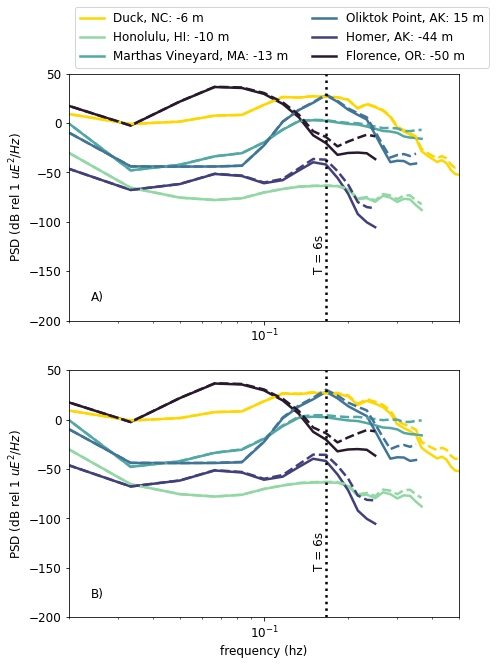

In [5]:
plt.rcParams['lines.linewidth'] = 2.5
plt.rc('font', size=12)


fig,ax = plt.subplots(2,1,figsize=(7,10))
ax[0].plot(frq_duck,psd_duck_raw,label='Duck, NC: '+ str(h[0])+' m',c = 'gold')
ax[0].plot(frq_kno,psd_kno_raw,label='Honolulu, HI: '+ str(h[1])+' m',c = clrs[1,:])
ax[0].plot(frq_mv,psd_mv_raw,label='Marthas Vineyard, MA: '+ str(h[2])+' m',c = clrs[2,:])
ax[0].plot(frq_oli,psd_oli_raw,label='Oliktok Point, AK: '+ str(h[3])+' m',c = clrs[3,:])
ax[0].plot(frq_hom,psd_hom_raw,label='Homer, AK: '+ str(h[4])+' m',c = clrs[4,:])
ax[0].plot(frq_flo,psd_flo_raw,label='Florence, OR: '+ str(h[5])+' m',c = clrs[5,:])

ax[0].plot(frq_duck_d,psd_duck_d,c = 'gold',linestyle='dashed')
ax[0].plot(frq_kno_d,psd_kno_d,c = clrs[1,:],linestyle='dashed')
ax[0].plot(frq_mv_d,psd_mv_d,c = clrs[2,:],linestyle='dashed')
ax[0].plot(frq_oli_d,psd_oli_d,c = clrs[3,:],linestyle='dashed')
ax[0].plot(frq_hom_d,psd_hom_d,c = clrs[4,:],linestyle='dashed')
ax[0].plot(frq_flo_d,psd_flo_d,c = clrs[5,:],linestyle='dashed')
ax[0].plot((1/6,1/6),(-200,50),'k:')


ax[1].plot(frq_duck,psd_duck_raw,c = 'gold')
ax[1].plot(frq_kno,psd_kno_raw,c = clrs[1,:])
ax[1].plot(frq_mv,psd_mv_raw,c = clrs[2,:])
ax[1].plot(frq_oli,psd_oli_raw,c = clrs[3,:])
ax[1].plot(frq_hom,psd_hom_raw,c = clrs[4,:])
ax[1].plot(frq_flo,psd_flo_raw,c = clrs[5,:])

ax[1].plot(frq_duck,psd_duck,c = 'gold',linestyle='dashed')
ax[1].plot(frq_kno,psd_kno,c = clrs[1,:],linestyle='dashed')
ax[1].plot(frq_mv,psd_mv,c = clrs[2,:],linestyle='dashed')
ax[1].plot(frq_oli,psd_oli,c = clrs[3,:],linestyle='dashed')
ax[1].plot(frq_hom,psd_hom,c = clrs[4,:],linestyle='dashed')
ax[1].plot(frq_flo,psd_flo,c = clrs[5,:],linestyle='dashed')
ax[1].plot((1/6,1/6),(-200,50),'k:')

ax[0].legend(ncol=2,bbox_to_anchor=(0.0001,1))
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_xlim([0.02,0.5])
ax[1].set_xlim([0.02,0.5])
ax[1].set_xlabel('frequency (hz)')
ax[0].set_ylabel('PSD (dB rel 1 $uE^2/Hz$)')
ax[1].set_ylabel('PSD (dB rel 1 $uE^2/Hz$)')
ax[0].set_ylim([-200,50])
ax[1].set_ylim([-200,50])
ax[0].text(0.15,-150 ,'T = 6s',rotation='vertical')
ax[1].text(0.15,-150 ,'T = 6s',rotation='vertical')
ax[0].text(0.024,-180 ,'A)')
ax[1].text(0.024,-180 ,'B)')
# plt.show()
plt.savefig('/Users/hglover/Downloads/strainH1T6_depthcorr.png')